<a href="https://colab.research.google.com/github/nupursjsu/Deep-Learning/blob/master/Ungraded_Assignment5/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing necessary libraries

In [1]:
!pip install seaborn
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-7sume6z0
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-7sume6z0
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0f8569aef3a0a4674d43a7a8ced3367c36ca95401_-cp36-none-any.whl size=101461 sha256=85d18269682f4dc428460443795cab0ec529627e2489a52fd9e5af24e9b24bf1
  Stored in directory: /tmp/pip-ephem-wheel-cache-r5kz7sgy/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [2]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Importing tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2.2.0


## Loading The Auto MPG dataset

In [3]:
ds_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
ds_path

32768/30286 [================================] - 0s 5us/step


'/root/.keras/datasets/auto-mpg.data'

In [4]:
#importing data to pandas dataframe
columns = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_df = pd.read_csv(ds_path, names=columns,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

df = raw_df.copy()
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


## Preprocessing the data

In [5]:
#Checking for null values
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [0]:
#Dropping null value records
df = df.dropna()

In [0]:
#One hot encoding the categorical column "Origin"
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [8]:
df = pd.get_dummies(df, prefix='', prefix_sep='')
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [0]:
#Splitting the dataset into train and test set
train_df = df.sample(frac=0.8,random_state=0)
test_df = df.drop(train_df.index)

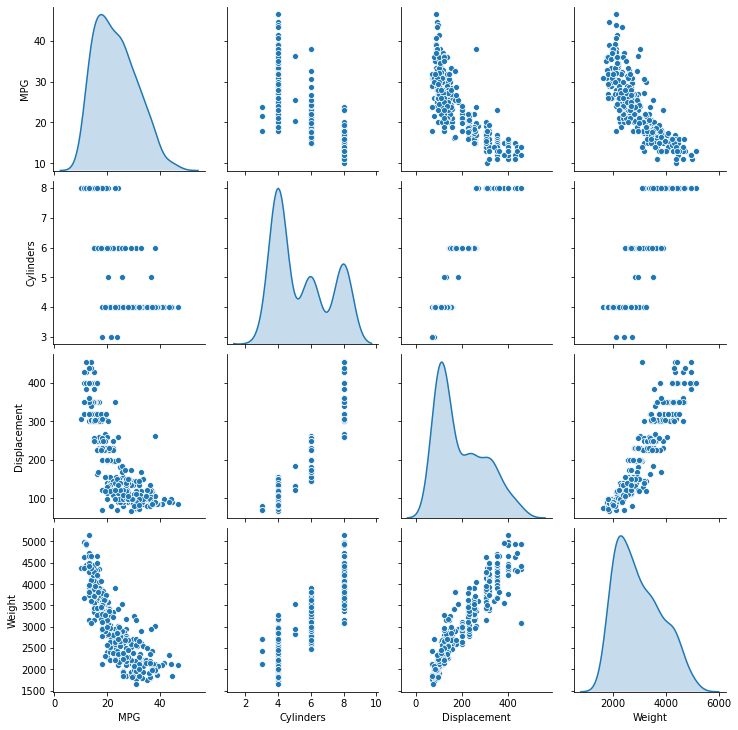

In [10]:
#Plotting sns plot for train dataset
sns.pairplot(train_df[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [11]:
#Looking at the overall statics
train_stats = train_df.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [0]:
#Splitting features from labels
train_labels = train_df.pop('MPG')
test_labels = test_df.pop('MPG')

In [0]:
#Normalizing the data
def normalize(x):
  return (x - train_stats['mean']) / train_stats['std']

norm_train_data = normalize(train_df)
norm_test_data = normalize(test_df)

## Building the model

In [0]:
def build_mymodel():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_df.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
#Creating instance of the model
model = build_mymodel()

In [16]:
#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [26]:
EPOCHS = 500

history = model.fit(
  norm_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:3.6389,  mae:1.2930,  mse:3.6389,  val_loss:9.2612,  val_mae:2.2949,  val_mse:9.2612,  
....................................................................................................
Epoch: 100, loss:3.1966,  mae:1.2031,  mse:3.1966,  val_loss:9.1391,  val_mae:2.2766,  val_mse:9.1391,  
....................................................................................................
Epoch: 200, loss:3.0330,  mae:1.1372,  mse:3.0330,  val_loss:9.3242,  val_mae:2.2962,  val_mse:9.3242,  
....................................................................................................
Epoch: 300, loss:2.9043,  mae:1.1376,  mse:2.9043,  val_loss:9.4008,  val_mae:2.3389,  val_mse:9.4008,  
....................................................................................................
Epoch: 400, loss:2.4701,  mae:1.0370,  mse:2.4701,  val_loss:9.6645,  val_mae:2.3794,  val_mse:9.6645,  
........................................................................

## Visualizing the model's training progress using the stats stored in the history object.

In [27]:
hist = pd.DataFrame(history.history)
hist.columns

Index(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'], dtype='object')

In [28]:
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse
495,2.373552,1.001801,2.373552,9.695973,2.368437,9.695973
496,2.383887,1.013124,2.383887,9.943082,2.390607,9.943082
497,2.255263,0.998808,2.255263,9.707644,2.407400,9.707644
498,2.161270,0.946097,2.161270,10.355954,2.480617,10.355954
499,2.710985,1.088008,2.710985,9.833177,2.368699,9.833177


In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [MPG]')

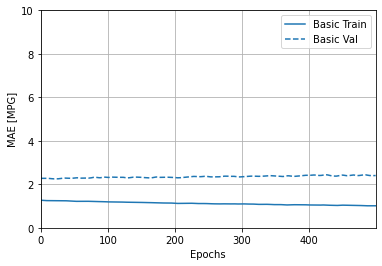

In [30]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

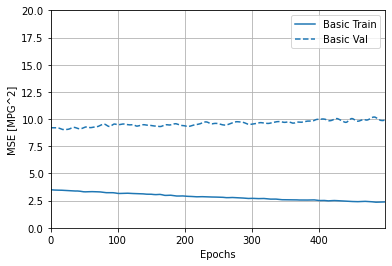

In [31]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')

This graph shows little improvement, or even degradation in the validation error after about 100 epochs. 

## Doing Early stopping to stop training the model when validation score doesn't improve

In [32]:
model = build_mymodel()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(norm_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:573.0825,  mae:22.6405,  mse:573.0825,  val_loss:568.3078,  val_mae:22.3873,  val_mse:568.3078,  
..............................................................

Text(0, 0.5, 'MAE [MPG]')

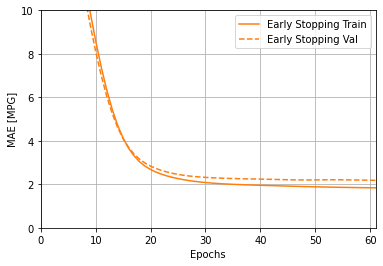

In [33]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

## Evaluating model on test data

In [34]:
loss, mae, mse = model.evaluate(norm_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 5.8466 - mae: 1.9155 - mse: 5.8466
Testing set Mean Abs Error:  1.92 MPG


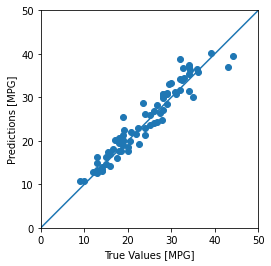

In [35]:
## Making predictions
test_preds = model.predict(norm_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_preds)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Looks like model is doing reasonably well

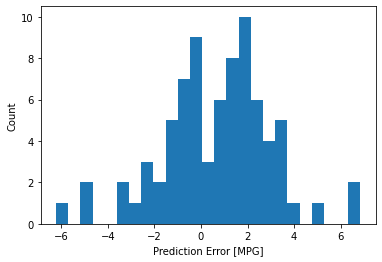

In [36]:
#Checking the error distribution
error = test_preds - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

We can see the error distribution is not guassian, may be because of the sample number of samples.

## Conclusion

Early stopping proved to be a very powerful technique to prevent overfitting.